# Airline safety

## 1.Topic: Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?

When aircraft crashes occur, people tend to avoid choosing the airline's aircraft. Some academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters. However, some people argue that their decisions may not be rationnal and there might be no use in preventing from meeting fatal crashes.

The paper study this by looking at safety records for major commercial airlines over the past 30 years, which is based on the Aviation Safety Network’s database. We use the method from Nate Silver in 2014,which break the 30-year period down into two halves: first from 1985 to 1999, and then from 2000 to 2014. 

Then the paper build multivariate linear models to indentify the correlation between the both.

In the end, We find a significant positive correlation between air accidents and fatal accidents from 85 to 99, as well as air accidents and fatal accidents from 00 to 14. So it is right for people to reject airlines that have had accident

# 2.Data

Data include airlines, available seat kilometers flown every week, total number of incidents in 1985–1999 and 2000-2014, total number of Fatal accidents in 1985–1999 and 2000-2014,total number of fatalities in 1985–1999 and in 2000-2014.

In [3]:
import pandas as pd

A = pd.read_csv('safety.csv')
A.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


### 2.1 Incidents

Make a scatter chart of the airlines' the total number of incidents in 1985–1999 and 2000-2014.

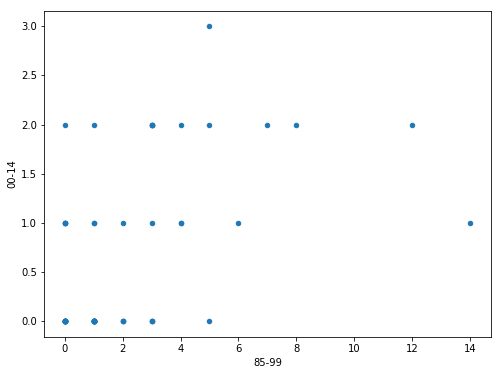

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
merged = pd.read_csv('safety.csv')
merged.plot(x='fatal_accidents_85_99', y='fatal_accidents_00_14', kind='scatter', alpha=1.0, figsize=(8, 6))
plt.ylabel('00-14')
plt.xlabel('85-99')

plt.show()

From the plot, it appears that citations are positively correlated with total number of incidents in 85-99 and 00-14.

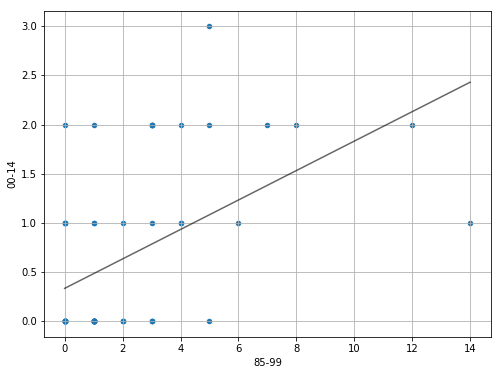

In [36]:
merged = pd.read_csv('safety.csv')
merged.plot(x='fatal_accidents_85_99', y='fatal_accidents_00_14', kind='scatter', alpha=1.0, figsize=(8, 6))
plt.ylabel('00-14')
plt.xlabel('85-99')

plt.plot(np.unique(merged['fatal_accidents_85_99']),
         np.poly1d(np.polyfit(merged['fatal_accidents_85_99'], merged['fatal_accidents_00_14'], 1))(np.unique(merged['fatal_accidents_85_99'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

### 2.2 Fatal Accidents

Make a scatter chart of the airlines' the total number of fatal accidents in 1985–1999 and 2000-2014.

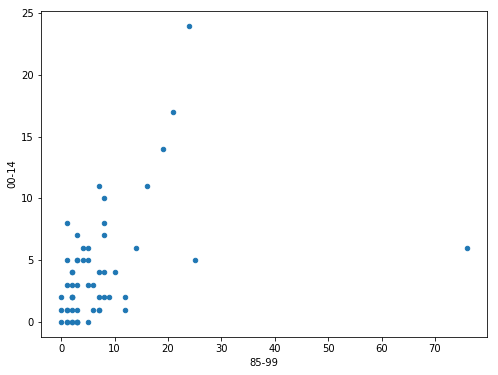

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
merged = pd.read_csv('safety.csv')
merged.plot(x='incidents_85_99', y='incidents_00_14', kind='scatter', alpha=1.0, figsize=(8, 6))
plt.ylabel('00-14')
plt.xlabel('85-99')

plt.show()

From the plot, it appears that total number of fatal accident in 85-99 are positively correlated with total number of fatal accidents in 00-14.

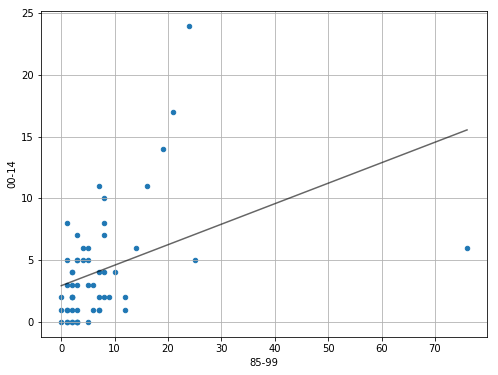

In [38]:
merged = pd.read_csv('safety.csv')
merged.plot(x='incidents_85_99', y='incidents_00_14', kind='scatter', alpha=1.0, figsize=(8, 6))
plt.ylabel('00-14')
plt.xlabel('85-99')

plt.plot(np.unique(merged['incidents_85_99']),
         np.poly1d(np.polyfit(merged['incidents_85_99'], merged['incidents_00_14'], 1))(np.unique(merged['incidents_85_99'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

### 2.3 Available seat kilometers flown every week

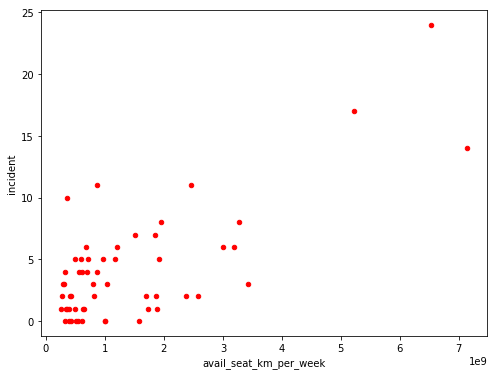

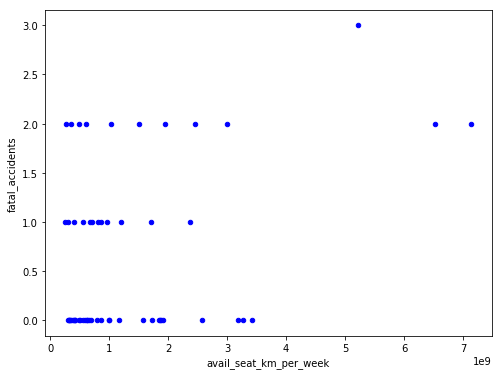

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
merged = pd.read_csv('safety.csv')
merged.plot(x='avail_seat_km_per_week', y='incidents_00_14', kind='scatter',color='red',alpha=1.0, figsize=(8, 6))
plt.ylabel('incident')
plt.xlabel('avail_seat_km_per_week')
merged.plot(x='avail_seat_km_per_week', y='fatal_accidents_00_14', kind='scatter',color='blue',alpha=1.0, figsize=(8, 6))
plt.ylabel('fatal_accidents')
plt.xlabel('avail_seat_km_per_week')

plt.show()

 It can be found that the greater the number of passengers in an airline, the greater the probability that the accident will occur.

## 3.Hypothesis and Test

### 3.1 Develop a hypothesis

Based on previous descriptive statistics, the article assumes that：

* The total number of fatal accident in 85-99 are positively correlated with total number of fatal accidents in 00-14.
* The total number of incidents in 85-99 are positively correlated with total number of incidents in 00-14.

To attempt to test thess hypothesises , we can use a **linear regression model**

$$
fatal_2 = \beta_0 + \beta_1 fatal_1  +\beta_2 ASK+ u_t \\
incident_2 = \beta_0 + \beta_1 incident_1 +\beta_2 ASK+ u_t \\
$$
* $\beta_0$ is the constant term
* $\beta_1$ and $\beta_2$ is the slope term
* $u_t$ is the error term
* $fatal_2$ is the total number of fatal accident in 00-14；$fatal_1$ is the total number of fatal accident in 85-99
* $incident_2$ is the total number of incidents in 00-14；$incident_1$ is the total number of incidents in 85-99

### 3.2 Test

#### 3.2.1 Test: Fatal accidents

In [13]:
merged['constant'] = 1

In [27]:
import statsmodels.api as sm

reg = sm.OLS(endog=merged['fatal_accidents_00_14'], exog=merged[['constant', 'fatal_accidents_85_99','avail_seat_km_per_week']], missing='drop')

In [16]:
results = reg.fit()
results

Original Result

In [17]:
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     fatal_accidents_00_14   R-squared:                       0.275
Model:                               OLS   Adj. R-squared:                  0.247
Method:                    Least Squares   F-statistic:                     10.03
Date:                   Sun, 28 Jan 2018   Prob (F-statistic):           0.000202
Time:                           17:50:15   Log-Likelihood:                -61.434
No. Observations:                     56   AIC:                             128.9
Df Residuals:                         53   BIC:                             134.9
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Using robust standard errors

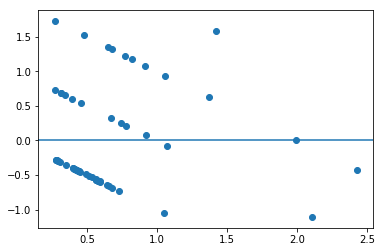

In [24]:
plt.scatter(results.predict(), results.resid)
plt.axhline()
plt.show()

The above plot shows that errors are generally well distributed about 0, however variance increases with the dependent variable.

This is known as heteroskedascity.

When heteroskedascity is present, robust standard errors should be used


In [25]:
results = reg.fit(cov_type='HC0')
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     fatal_accidents_00_14   R-squared:                       0.275
Model:                               OLS   Adj. R-squared:                  0.247
Method:                    Least Squares   F-statistic:                     10.21
Date:                   Sun, 28 Jan 2018   Prob (F-statistic):           0.000178
Time:                           15:33:39   Log-Likelihood:                -61.434
No. Observations:                     56   AIC:                             128.9
Df Residuals:                         53   BIC:                             134.9
Df Model:                              2                                         
Covariance Type:                     HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### Result
According to the results of the test, the P value of Fatal accidents in 85-99 is 0.007, which is significant. It means that The total number of fatal accident in 85-99 are positively correlated with total number of fatal accidents in 00-14.








#### 3.2.2 Test: incidents

In [10]:
import statsmodels.api as sm

reg = sm.OLS(endog=merged['incidents_00_14'], exog=merged[['constant', 'incidents_85_99','avail_seat_km_per_week']], missing='drop')

D:\Ana\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
results = reg.fit()
results

Original Result

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        incidents_00_14   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     35.18
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.89e-10
Time:                        15:24:53   Log-Likelihood:                -140.09
No. Observations:                  56   AIC:                             286.2
Df Residuals:                      53   BIC:                             292.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
constant                   0

Using robust standard errors

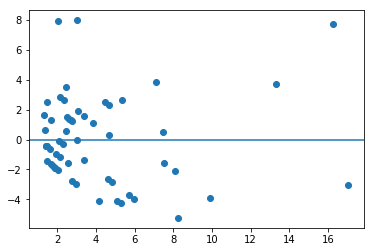

In [13]:
plt.scatter(results.predict(), results.resid)
plt.axhline()
plt.show()

The above plot shows that errors are generally well distributed about 0, however variance increases with the dependent variable.

This is known as heteroskedascity.

When heteroskedascity is present, robust standard errors should be used


In [14]:
results = reg.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        incidents_00_14   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     15.47
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           5.10e-06
Time:                        15:26:08   Log-Likelihood:                -140.09
No. Observations:                  56   AIC:                             286.2
Df Residuals:                      53   BIC:                             292.2
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
constant                   0

##### Result
According to the results of the test, the P value of incidents in 85-99 is 0.054, which is significant. 
* It means that the total number of incidents in 85-99 are positively correlated with total number of incidents in 00-14.

## 4 Conclusions

### 4.1 For customer
The results of this article show that the intuition that people do not choose an airline is correct. Both in the incidents and in the fatal accidents, the airlines have the very strong self correlation.

Therefore, when you are choosing an airline, it is useful to check the airline’s track record, which tells you something about its probability of future crashes.In particular, you should look toward an airline’s rate of dangerous incidents of any kind and its number of fatalities or fatal accidents.
### 4.2 For airline
For airlines, accidents are fatal, which not only leads to direct economic losses but also long-term customer churn. Therefore, airlines should always be vigilant and try to avoid any accidents.

## References
* Nate Silver. Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?. https://fivethirtyeight.com/features/should-travelers-avoid-flying-airlines-that-have-had-crashes-in-the-past/


* https://github.com/fivethirtyeight/data/


* Natasha. intro-to-statsmodels